<h2>Question 8: Naive Bayes VS SVM Classification</h2>

In [1]:
%run Common.ipynb

%matplotlib inline

def print_scores(y_true, y_pred):
    print("accuracy:{}".format(accuracy_score(y_true, y_pred)))
    print("precision:{}".format(precision_score(y_true, y_pred, average="macro")))
    print("recall:{}".format(recall_score(y_true, y_pred, average="macro")))
    print("f1:{}".format(f1_score(y_true, y_pred, average="macro")))
        
def fit_predict_and_plot(clf, train_data, train_labels, test_data, test_labels, class_names):
    clf.fit(train_data, train_labels)

    pred = clf.predict(test_data)
    
    cnf_matrix = confusion_matrix(test_labels, pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    
    print_scores(test_labels, pred)
    
    return clf

<h3>Loading Data with New Categories</h3>

In [2]:
from sklearn.datasets import fetch_20newsgroups
#default categories from the instruction and questions.
categories = [ 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']

#load training and testing datasets for feature extraction
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                          shuffle=True, random_state=42)
twenty_test  = fetch_20newsgroups(subset='test', categories=categories,
                                          shuffle=True, random_state=42)

<h3>Lemmatize/Reduce Datasets</h3>

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

reduction_pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, stop_words = 'english', analyzer=lemmatize_rmv_numeric)),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=0))
])

train_reduced = reduction_pipeline.fit_transform(twenty_train.data, twenty_train.target)
test_reduced = reduction_pipeline.transform(twenty_test.data)

<h3>Naïve Bayes Classification Results</h3>

Confusion matrix, without normalization
[[280  38  45  29]
 [127 162  51  45]
 [ 41  20 319  10]
 [  1   1   7 389]]
Normalized confusion matrix
[[0.71 0.1  0.11 0.07]
 [0.33 0.42 0.13 0.12]
 [0.11 0.05 0.82 0.03]
 [0.   0.   0.02 0.98]]
accuracy:0.7348242811501597
precision:0.7337435026582935
recall:0.7326001469217549
f1:0.7198669718602562


GaussianNB(priors=None)

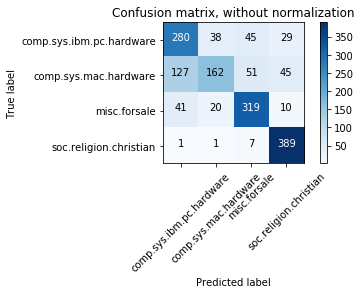

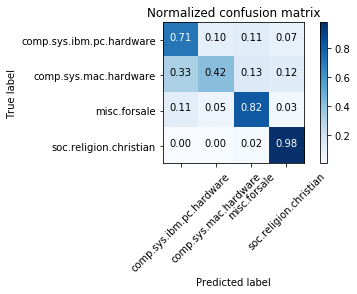

In [4]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
fit_predict_and_plot(clf, train_reduced, twenty_train.target, test_reduced, twenty_test.target, twenty_train.target_names)

<h3>SVM Classification with 'One VS One' Results</h3>

Confusion matrix, without normalization
[[291   0  98   3]
 [256  12 115   2]
 [ 17   0 372   1]
 [ 43   0  59 296]]
Normalized confusion matrix
[[0.74 0.   0.25 0.01]
 [0.66 0.03 0.3  0.01]
 [0.04 0.   0.95 0.  ]
 [0.11 0.   0.15 0.74]]
accuracy:0.6204472843450479
precision:0.7592947802897612
recall:0.6177701291888299
f1:0.5520715130415543


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

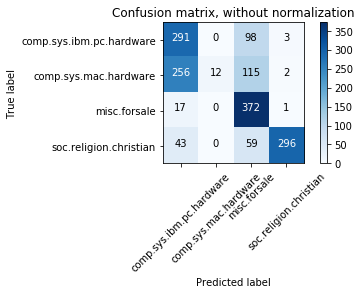

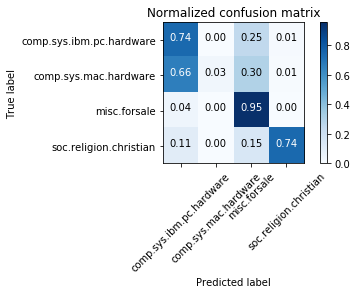

In [5]:
from sklearn.svm import SVC, LinearSVC
clf = SVC(decision_function_shape='ovo')
fit_predict_and_plot(clf, train_reduced, twenty_train.target, test_reduced, twenty_test.target, twenty_train.target_names)

<h3>SVM Classification with 'One VS Rest ' Results</h3>

Confusion matrix, without normalization
[[306  63  17   6]
 [ 45 313  24   3]
 [ 17  15 356   2]
 [  5   1   3 389]]
Normalized confusion matrix
[[0.78 0.16 0.04 0.02]
 [0.12 0.81 0.06 0.01]
 [0.04 0.04 0.91 0.01]
 [0.01 0.   0.01 0.98]]
accuracy:0.8715654952076677
precision:0.8703361807189364
recall:0.8709516763447129
f1:0.8704664929515029


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

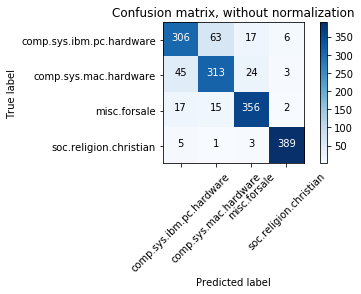

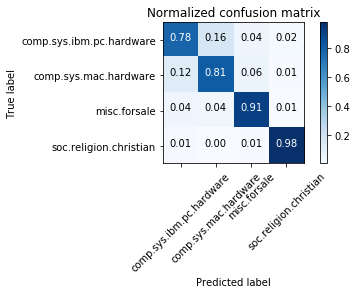

In [6]:
clf = LinearSVC()
fit_predict_and_plot(clf, train_reduced, twenty_train.target, test_reduced, twenty_test.target, twenty_train.target_names)